# Data Preparation and Processing

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [2]:
train_labels = []
train_samples = []

Example data:
1. An experiement drug was tested on individuals from ages 13 to 100 in a clinical trial.
2. The trial had 2100 participants. Half were under 65 years old, half were 65 years old or older.
3. Around 95% of patients 65 or older (older) experienced side effects (y=1).
3. Around 95% of patients under 65 (younger) experienced no side effects (y=0).

In [3]:
for i in range(50):
    # The ~5% of younger individuals who did experienced side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)  # 1 represent a patient experienced side effects

    # The ~5% of older individuals who did not experienced side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0) # 0 represent a patient experienced no side effects

for i in range(1000):
    # The ~95% of younger individuals who did not experienced side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0) # 0 represent a patient experienced no side effects

    # The ~95% of older individuals who did experienced side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1) # 1 represent a patient experienced side effects

In [4]:
for i in train_samples:
    print(i)

50
73
39
80
40
78
33
84
19
73
19
88
55
86
62
75
62
73
37
92
46
86
21
79
17
68
28
79
15
90
38
69
59
80
26
89
36
92
53
65
27
72
45
69
22
75
49
65
47
77
15
86
44
85
15
85
43
70
16
98
14
94
31
90
31
75
55
82
51
80
22
77
57
95
36
80
23
99
63
86
23
96
25
75
53
90
44
76
24
96
27
73
51
86
22
89
59
88
18
95
51
92
52
70
23
94
54
80
27
82
25
65
33
75
42
66
17
80
60
75
35
97
61
95
63
92
35
90
20
85
54
73
64
87
31
76
58
74
55
70
24
85
53
78
63
76
42
81
41
95
44
66
56
99
63
66
47
86
37
73
44
98
51
72
37
80
44
92
61
98
44
68
14
69
17
97
55
91
34
100
27
86
24
76
30
100
51
93
25
82
31
66
13
75
64
66
28
67
23
98
19
66
57
72
62
96
17
73
19
94
44
93
54
67
62
75
23
69
13
81
18
99
19
91
57
87
34
86
46
93
52
94
42
90
23
93
60
83
39
72
44
87
14
94
56
76
47
83
23
69
29
97
27
100
27
82
60
91
27
79
32
77
39
86
13
98
48
66
45
77
23
82
22
90
35
100
49
78
21
80
35
73
14
84
37
69
21
79
50
88
41
98
35
82
61
96
38
67
19
94
31
94
38
70
61
98
25
91
40
84
46
91
43
98
31
83
36
67
25
67
52
89
15
75
26
77
57
91
37
94
30
99


In [5]:
for i in train_labels:
    print(i)

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [8]:
for i in scaler_train_samples:
    print(i)

[0.02298851]
[0.94252874]
[0.67816092]
[0.08045977]
[0.12643678]
[1.]
[0.96551724]
[0.70114943]
[0.7816092]
[0.88505747]
[0.90804598]
[0.06896552]
[0.94252874]
[0.09195402]
[0.11494253]
[0.25287356]
[0.20689655]
[0.97701149]
[0.40229885]
[0.1954023]
[0.7816092]
[0.49425287]
[0.47126437]
[0.81609195]
[0.06896552]
[0.2183908]
[0.59770115]
[0.77011494]
[0.93103448]
[0.82758621]
[0.54022989]
[0.98850575]
[0.77011494]
[0.66666667]
[0.68965517]
[0.79310345]
[0.91954023]
[0.36781609]
[0.03448276]
[0.62068966]
[0.5862069]
[0.83908046]
[0.90804598]
[0.10344828]
[0.65517241]
[0.18390805]
[0.96551724]
[1.]
[0.64367816]
[0.54022989]
[0.40229885]
[0.93103448]
[0.43678161]
[0.63218391]
[0.05747126]
[0.11494253]
[0.93103448]
[0.7816092]
[0.63218391]
[0.98850575]
[0.86206897]
[0.27586207]
[0.59770115]
[0.24137931]
[0.04597701]
[0.06896552]
[0.88505747]
[0.8045977]
[0.59770115]
[0.1954023]
[0.77011494]
[0.57471264]
[0.27586207]
[0.04597701]
[0.14942529]
[0.52873563]
[0.18390805]
[0.05747126]
[0.6551724

# Simple tf.keras Sequential Model

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [10]:
pysical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(pysical_devices))

Num GPUs Available:  0


In [11]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
X_train = scaler_train_samples
y_train = train_labels

In [15]:
model.fit(x=X_train, y=y_train, batch_size=10, epochs=30, shuffle=True, verbose=2)

Train on 2100 samples
Epoch 1/30
2100/2100 - 1s - loss: 0.6379 - accuracy: 0.5610
Epoch 2/30
2100/2100 - 0s - loss: 0.6058 - accuracy: 0.6433
Epoch 3/30
2100/2100 - 0s - loss: 0.5709 - accuracy: 0.7248
Epoch 4/30
2100/2100 - 0s - loss: 0.5380 - accuracy: 0.7733
Epoch 5/30
2100/2100 - 1s - loss: 0.5034 - accuracy: 0.8048
Epoch 6/30
2100/2100 - 1s - loss: 0.4675 - accuracy: 0.8410
Epoch 7/30
2100/2100 - 1s - loss: 0.4339 - accuracy: 0.8562
Epoch 8/30
2100/2100 - 1s - loss: 0.4040 - accuracy: 0.8733
Epoch 9/30
2100/2100 - 1s - loss: 0.3779 - accuracy: 0.8881
Epoch 10/30
2100/2100 - 1s - loss: 0.3558 - accuracy: 0.8981
Epoch 11/30
2100/2100 - 1s - loss: 0.3379 - accuracy: 0.9048
Epoch 12/30
2100/2100 - 1s - loss: 0.3234 - accuracy: 0.9143
Epoch 13/30
2100/2100 - 1s - loss: 0.3119 - accuracy: 0.9167
Epoch 14/30
2100/2100 - 1s - loss: 0.3030 - accuracy: 0.9200
Epoch 15/30
2100/2100 - 0s - loss: 0.2956 - accuracy: 0.9252
Epoch 16/30
2100/2100 - 1s - loss: 0.2900 - accuracy: 0.9229
Epoch 17/30

In [16]:
model.fit(x=X_train, y=y_train, validation_split= 0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/30
1890/1890 - 1s - loss: 0.2593 - accuracy: 0.9402 - val_loss: 0.2596 - val_accuracy: 0.9333
Epoch 2/30
1890/1890 - 1s - loss: 0.2585 - accuracy: 0.9376 - val_loss: 0.2604 - val_accuracy: 0.9333
Epoch 3/30
1890/1890 - 1s - loss: 0.2576 - accuracy: 0.9434 - val_loss: 0.2577 - val_accuracy: 0.9333
Epoch 4/30
1890/1890 - 1s - loss: 0.2566 - accuracy: 0.9413 - val_loss: 0.2581 - val_accuracy: 0.9333
Epoch 5/30
1890/1890 - 1s - loss: 0.2559 - accuracy: 0.9450 - val_loss: 0.2557 - val_accuracy: 0.9333
Epoch 6/30
1890/1890 - 1s - loss: 0.2553 - accuracy: 0.9365 - val_loss: 0.2569 - val_accuracy: 0.9333
Epoch 7/30
1890/1890 - 1s - loss: 0.2545 - accuracy: 0.9418 - val_loss: 0.2567 - val_accuracy: 0.9333
Epoch 8/30
1890/1890 - 1s - loss: 0.2538 - accuracy: 0.9418 - val_loss: 0.2555 - val_accuracy: 0.9333
Epoch 9/30
1890/1890 - 1s - loss: 0.2532 - accuracy: 0.9418 - val_loss: 0.2552 - val_accuracy: 0.9333
Epoch 10/30
1890/1890 - 1s - loss: 

# Preprocess Test Data

In [17]:
test_labels = []
test_samples = []

In [18]:
for i in range(10):
    # The ~5% of younger individuals who did experienced side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The ~5% of older individuals who did not experienced side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The ~95% of younger individuals who did not experienced side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The ~95% of older individuals who did experienced side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [19]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [20]:
scaler_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [21]:
X_test = scaler_test_samples
y_test = test_labels

# Predict

In [22]:
predictions = model.predict(x=X_test, batch_size=10, verbose=0)

In [23]:
for i in predictions:
    print(i)
    
# the first prediction in our test set says that the patient has 3.89% probability of not experienced side effects and a 96.1% probability of experienced side effects

[0.12951043 0.87048954]
[0.04087682 0.95912313]
[0.601973   0.39802706]
[0.9677078  0.03229218]
[0.9708163 0.0291837]
[0.9707798  0.02922027]
[0.014814   0.98518604]
[0.01088098 0.98911905]
[0.2294895 0.7705105]
[0.014814   0.98518604]
[0.03698217 0.9630179 ]
[0.12951043 0.87048954]
[0.1417155 0.8582845]
[0.2294895 0.7705105]
[0.04087682 0.95912313]
[0.9419557  0.05804433]
[0.08931605 0.910684  ]
[0.2294895 0.7705105]
[0.03023669 0.96976334]
[0.9709986  0.02900145]
[0.9713597  0.02864028]
[0.1689968 0.8310032]
[0.97092587 0.02907421]
[0.601973   0.39802706]
[0.97096217 0.02903781]
[0.97117966 0.02882031]
[0.9368191  0.06318088]
[0.9708528  0.02914714]
[0.09816025 0.9018397 ]
[0.9650133  0.03498665]
[0.04987394 0.95012605]
[0.9663866  0.03361337]
[0.9677078  0.03229218]
[0.12951043 0.87048954]
[0.95939636 0.04060359]
[0.9223994  0.07760057]
[0.93057865 0.06942136]
[0.1689968 0.8310032]
[0.9003393  0.09966071]
[0.9706697  0.02933028]
[0.64949137 0.3505086 ]
[0.06072601 0.93927395]
[0.030

In [24]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [25]:
for i in rounded_predictions:
    print(i)

1
1
0
0
0
0
1
1
1
1
1
1
1
1
1
0
1
1
1
0
0
1
0
0
0
0
0
0
1
0
1
0
0
1
0
0
0
1
0
0
0
1
1
1
0
1
0
1
1
1
1
0
1
1
0
1
0
0
1
1
0
0
0
1
0
1
0
1
0
1
0
1
1
0
1
0
1
1
1
0
1
0
1
1
0
1
1
0
0
1
1
1
1
0
1
1
1
1
1
0
1
0
1
1
0
0
1
1
1
1
1
1
1
0
0
1
0
1
0
0
1
0
0
1
1
1
0
0
1
1
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
1
0
1
1
0
1
0
0
0
0
1
1
1
1
0
1
0
1
1
0
1
0
0
0
0
0
1
0
0
1
0
1
0
1
1
0
1
0
0
1
1
0
0
1
1
1
0
1
0
1
1
1
0
0
1
0
0
1
0
0
1
1
0
0
0
0
1
1
1
0
0
0
0
1
0
1
0
1
0
1
1
0
1
0
1
0
1
1
0
0
0
0
1
0
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
1
1
0
1
0
1
0
1
1
1
1
0
0
0
1
1
0
1
0
0
1
1
0
0
1
1
0
1
0
0
0
0
0
1
1
0
1
0
1
1
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
1
0
0
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
0
1
0
0
0
0
1
1
0
1
1
1
1
0
1
1
1
0
0
0
0
1
1
1
0
0
1
1
0
1
1
1
0
0
1
0
0
1
1
0
1
0
0
0
1
1
1
1
0
0
1
1
0
1
1
0
1
0
1
1
1
1
1
1
0
0
1
0
0
1
0
1
1
0
1
1
0
0


# Confusion Matrix

In [26]:
y_pred=rounded_predictions

In [27]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [28]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[200  10]
 [ 10 200]]


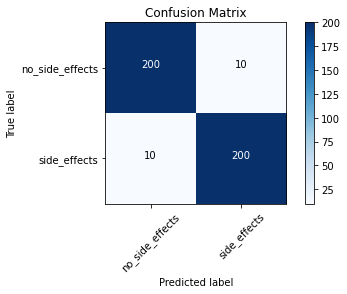

In [30]:
cm_plot_labels = ['no_side_effects', 'side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [31]:
print("\033[1m The result is telling us that we have: ",(cm[0,0]+cm[1,1]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm[0,1]+cm[1,0]),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(cm.sum()))

 The result is telling us that we have:  400 correct predictions.
 The result is telling us that we have:  20 incorrect predictions.
 We have a total predictions of:  420


# Classification Report

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       210
           1       0.95      0.95      0.95       210

    accuracy                           0.95       420
   macro avg       0.95      0.95      0.95       420
weighted avg       0.95      0.95      0.95       420



In [33]:
#calculate Accuracy, how often is the classifier correct?
print("Accuracy of the Artificial Neural Network model on the test set:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("\nWell, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the Artificial Neural Network model on the test set: 95.24%

Well, you got a classification rate of 95.24%


In [34]:
#calculate Precision
print("Precision of the Artificial Neural Network model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("\nPrecision: Precision is about being precise, i.e., how precise our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Artificial Neural Network model predicted a patient will experience side effect, that patient actually did", "{:.2%}".format(metrics.precision_score(y_test, y_pred)) ,"of the time.")

Precision of the Artificial Neural Network model: 95.24%

Precision: Precision is about being precise, i.e., how precise our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Artificial Neural Network model predicted a patient will experience side effect, that patient actually did 95.24% of the time.


In [35]:
#calculate Recall
print("Recall of the Artificial Neural Network model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("\nRecall: If there is a patient which experienced side effect in the test set, our Artificial Neural Network model can identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Recall of the Artificial Neural Network model: 95.24%

Recall: If there is a patient which experienced side effect in the test set, our Artificial Neural Network model can identify it 95.24% of the time.


# ROC AUC

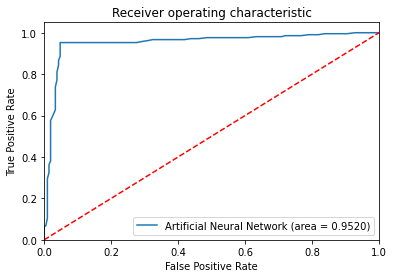

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
ann_roc_auc = roc_auc_score(y_test, model.predict(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Artificial Neural Network (area = %0.4f)' % ann_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()

## 1. model.save()

In [37]:
# Checks first to see if file exists already
# If not, the model is saved to disk.
import os.path
if os.path.isfile('C:\\Users\\רועי\\models\\medical_trial_model.h5') is False:
    model.save('C:\\Users\\רועי\\models\\medical_trial_model.h5')

This save functions saves:
1. The architecture of the model allowing to re-create the moddel.
2. The weights of the model.
3. The training configuration (loss, optimizer).
4. The state of the optimizer, allowing to resume training exactly where you left off.

In [38]:
from tensorflow.keras.models import load_model
new_model = load_model('C:\\Users\\רועי\\models\\medical_trial_model.h5')

In [39]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [40]:
new_model.get_weights()

[array([[-0.1957401 ,  0.70088005,  0.55371785, -0.19470528, -0.4281826 ,
         -0.04612941,  0.21005657,  0.61400914, -0.14110845,  0.56942123,
         -0.21934912,  0.10586765,  0.21677618, -0.13590312, -0.03210157,
         -0.51785004]], dtype=float32),
 array([ 0.        , -0.13798289, -0.13241398,  0.        ,  0.        ,
         0.22307517, -0.0388127 , -0.10989464,  0.        , -0.09587134,
         0.        ,  0.20313697,  0.19935992,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[ 1.81401521e-01, -1.76534846e-01,  1.95834249e-01,
          1.80630118e-01, -1.40403703e-01, -3.14510822e-01,
         -2.07160190e-01,  1.87564105e-01,  1.14399016e-01,
         -3.22368860e-01, -1.95855141e-01, -1.37663156e-01,
          2.56504089e-01, -1.47965699e-01, -2.71148711e-01,
          2.55932242e-01,  9.39164162e-02, -2.97280669e-01,
          3.28756481e-01,  1.74948305e-01,  1.94346458e-01,
          2.98387736e-01,  1.71173662e-01, -2.50112802e-01,
 

In [41]:
new_model.optimizer

### 2. model.to_json()

if you only need to save architecture of a model, and not its weights or its training configuration, you can see the following function to save the architecture only.

In [42]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [43]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dens

In [44]:
# model reconstruction from JSON:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from tensorflow.keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [45]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 3. model.save_weights()

If you only need to save the weights of the model, you cab use the following function save the weights only.

In [46]:
# Checks first to see if file exists already
# If not, the model is saved to disk.
import os.path
if os.path.isfile('C:\\Users\\רועי\\models\\my_model_weights.h5') is False:
    model.save_weights('C:\\Users\\רועי\\models\\my_model_weights.h5')

In [47]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [48]:
model2.load_weights('C:\\Users\\רועי\\models\\my_model_weights.h5')

In [49]:
model2.get_weights()

[array([[-0.1957401 ,  0.70088005,  0.55371785, -0.19470528, -0.4281826 ,
         -0.04612941,  0.21005657,  0.61400914, -0.14110845,  0.56942123,
         -0.21934912,  0.10586765,  0.21677618, -0.13590312, -0.03210157,
         -0.51785004]], dtype=float32),
 array([ 0.        , -0.13798289, -0.13241398,  0.        ,  0.        ,
         0.22307517, -0.0388127 , -0.10989464,  0.        , -0.09587134,
         0.        ,  0.20313697,  0.19935992,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[ 1.81401521e-01, -1.76534846e-01,  1.95834249e-01,
          1.80630118e-01, -1.40403703e-01, -3.14510822e-01,
         -2.07160190e-01,  1.87564105e-01,  1.14399016e-01,
         -3.22368860e-01, -1.95855141e-01, -1.37663156e-01,
          2.56504089e-01, -1.47965699e-01, -2.71148711e-01,
          2.55932242e-01,  9.39164162e-02, -2.97280669e-01,
          3.28756481e-01,  1.74948305e-01,  1.94346458e-01,
          2.98387736e-01,  1.71173662e-01, -2.50112802e-01,
 